In [128]:
#BASIC LIBS

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#ML LIBS
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from sklearn.model_selection import train_test_split

# Preparing Data

# Importing 

In [9]:
df=pd.read_csv("student_scores - student_scores.csv")

In [10]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Exploring 

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


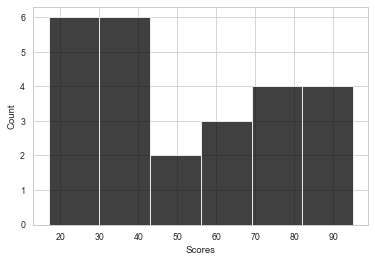

In [51]:
sns.set_palette(['#0000'])
sns.set_style("whitegrid")
sns.set_context("paper")
sns.histplot(data=df ,x=df['Scores']);

No Variation in the target or outliers  

In [57]:
df['Hours'].corr(df['Scores'])

0.9761906560220887

There are predictive power between y-targe and x-feature 

now let's find out it visually

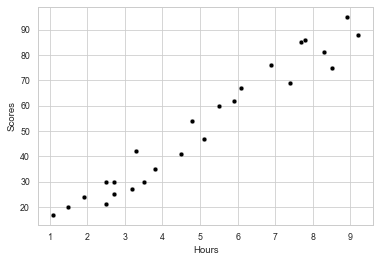

In [55]:
sns.scatterplot(x='Hours',y='Scores',data=df);

the figure shown positive correlation as we calculated 'excellent'

let discover the line 

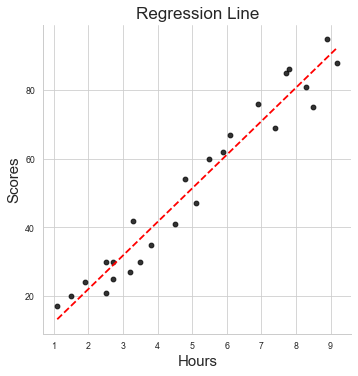

In [197]:
sns.lmplot(x='Hours',y='Scores',ci=False,data=df,line_kws={'color':'red','linestyle':'dashed'})
plt.title("Regression Line",fontsize=17)
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15);

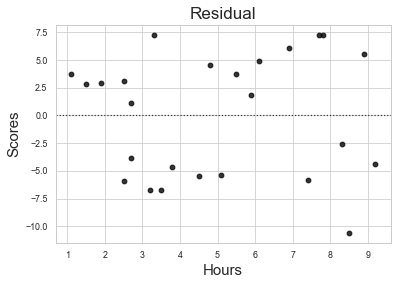

In [189]:
sns.residplot(x="Hours",y="Scores",data=df)
plt.title("Residual",fontsize=17)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15);

# splitting

In [198]:
X = df[['Hours']]
y = df['Scores']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

In [199]:
print(f'Train Set {x_train.shape} || {y_train.shape}\nTest Set  {X_test.shape}  ||  {y_test.shape}')

Train Set (17,) || (17,)
Test Set  (8, 1)  ||  (8,)


# Building Model

# Iterate

In [200]:
#instansiate
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [201]:
predictions = LR_model.predict(X_train)
m_sqr_err=mean_squared_error(y_train,predictions)

In [202]:
resid=(y_train-predictions)

In [203]:
print(m_sqr_err)

27.62711590980202


In [204]:
LR_model.score(X_train,y_train)

0.9515037021190215

In [205]:
coeff=LR_model.coef_[0].round(2)
intercept=LR_model.intercept_.round(2)
print("coefficient =",coeff)
print('intercept =',intercept)

coefficient = 9.63
intercept = 3.18


So The Equation of predicting Score is Score = 9.63 * [Hours]+3.28